In [2]:
import matplotlib.pyplot as plt
time=[]
for i in range(-1,10000):
    time.append(i)

In [3]:
class pulse:
    def __init__(self, id,pri=500,pwd=10,R=10):
        self.pi=3.14159265359
        self.Pt=10
        self.G=1
        self.pulse_train=[]
        self.id = id
        self.pri = pri
        self.pwd = pwd
        self.R = R
        self.P=(self.Pt*self.G)/(4*self.pi*(self.R**2))
        for i in range(-1,10000):
            if(i%self.pri<=self.pwd):
                self.pulse_train.append(self.P)
            else:
                self.pulse_train.append(0)

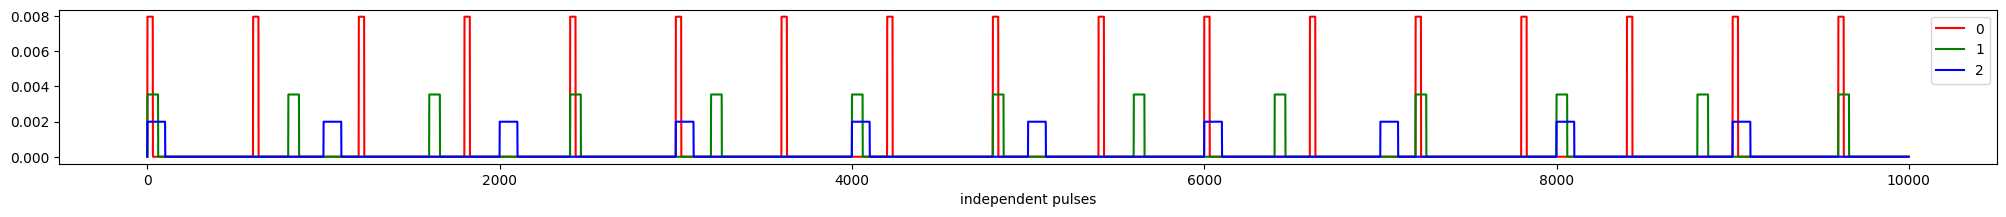

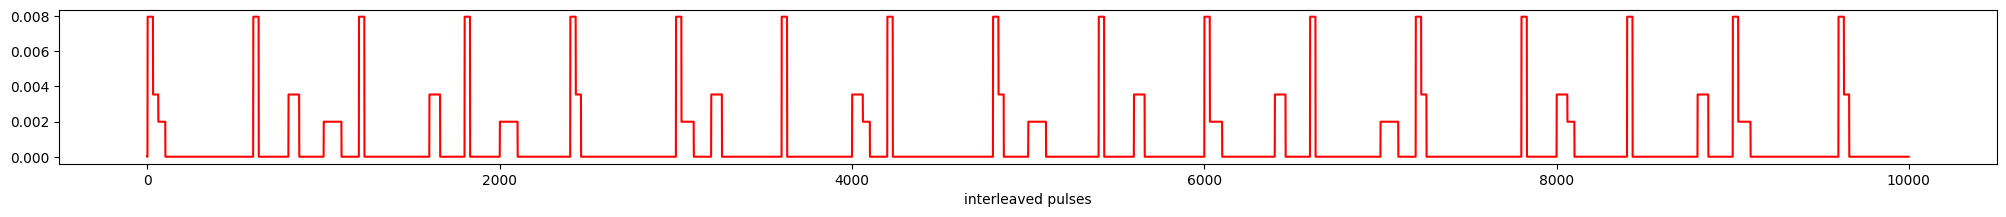

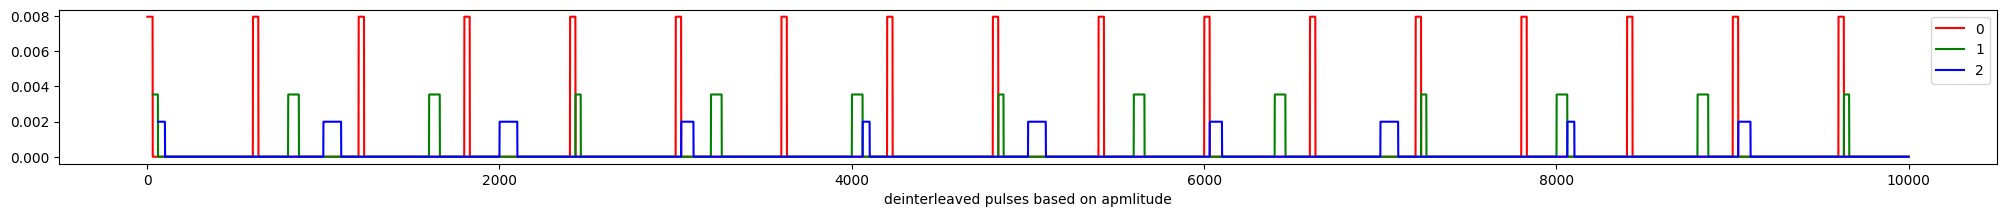

In [7]:
pulses=[]

pulse_0 = pulse(id=0,pri=600,pwd=30,R=10)
pulses.append(pulse_0)

pulse_1 = pulse(id=1,pri=800,pwd=60,R=15)
pulses.append(pulse_1)

pulse_2 = pulse(id=2,pri=1000,pwd=100,R=20)
pulses.append(pulse_2)

# pulse_3 = pulse(id=3,pri=2300,pwd=40,R=10)
# pulses.append(pulse_3)

ci=0#len(time)//4
cf=len(time)//1
clrs= 'rgbcmyk'
fig_x , fig_y = 25 , 2

plt.figure(figsize=(fig_x , fig_y))
for i in pulses:
    plt.plot(time[ci:cf],i.pulse_train[ci:cf], color=clrs[i.id], label=str(i.id))
plt.legend()
plt.xlabel("independent pulses")
plt.show()

pulse_f=[]
for i in time:
    max_t=[]
    for j in pulses:
        max_t.append(j.pulse_train[i])
    pulse_f.append(max(max_t))
plt.figure(figsize=(fig_x , fig_y))
plt.plot(time[ci:cf],pulse_f[ci:cf], color=clrs[0])
plt.xlabel("interleaved pulses")
plt.show()

deinterleaved_pulses={}
for i in pulse_f:
    if i!=0:
        if(i not in deinterleaved_pulses):
            deinterleaved_pulses[i]=[]
    for j in list(deinterleaved_pulses.keys()):
        if j==i:
            deinterleaved_pulses[j].append(i)
        else:
            deinterleaved_pulses[j].append(0)

plt.figure(figsize=(fig_x , fig_y))
idx=0
for i in list(deinterleaved_pulses.values()):
    plt.plot(time[(cf-len(i[ci:cf])):cf],i[ci:cf], color=clrs[idx], label=str(idx))
    idx+=1
plt.legend()
plt.xlabel("deinterleaved pulses based on apmlitude")
plt.show()